## Intro
For today's material, we'll be diving into _object oriented programming_, which is a way of thinking about and writing our programs to make them cleaner and more understandable. The basic idea behind object-oriented programming is to create new data structures, or _objects_, that compartmentalize some functionality that we want to be able to generically use. This requires us to introduce the concept of a **class**, as these are the structures through which new objects are defined.

We should all be pretty familiar with objects already, as everything that we've been using in python is one! Objects are, as you might guess, things in the code that represent some, well, object. In particular, objects in python will have associated _attributes_, which are variables that define properties of the object, and _methods_, which are functions that allow you to do things with the object. For example, a `numpy` array is an object, and it has an associated set of attributes and methods that we've already used.

In [1]:
import numpy as np

arr = np.zeros((2,2)) # 'initialize' the object
print(arr.shape) # access the shape attribute
print(arr.reshape((1,4))) # use the reshape method

(2, 2)
[[0. 0. 0. 0.]]


As we've seen, using the syntax `<object>.attribute` or `<object>.method()` allows us to access properties of the object and do things to the object. Building a **class** enables us to build custom objects of our own, for whatever our task may be.

## Classes warm-up
Before we dive into the meat of today's workshop content, let's practice building some classes. In the cell block below, we've defined an example class so you can familiarize yourself with the basic syntax and structure of a class.

In [2]:
class MyObject(): # this is how we tell the computer we're defining a new class, which will be named `MyObject'
    def __init__(self, attribute): # you always need one of these methods, which is called a constructor
        # within the constructor, we can set some basic attributes that will be associated with the object
        self.attribute = attribute

    def method(self): # this is how we define a method in a class
        return self.attribute**2 # in this case, the method squares our attribute

Ok so above, we've defined a new class called `MyObject`, which doesn't really do anything useful at the moment. Note that the first argument of every function within the class needs to be `self`, so that the functions can access all of the class attributes. We can create an object of this class like so:

In [3]:
obj = MyObject(5)

# then we can access the attributes using the same type of dot notation as above:
print(obj.attribute)
print(obj.method())

5
25


Ok that class was pretty basic (and useless), but it's a good illustrative example for how to structure a class. In the cell block below, fill in the missing lines to define a class `Circle`, which takes in the radius and has a method to calculate the area of the circle.

In [ ]:
# create the class here
class Circle:
    def __init__(self, radius):
        

    def area(self):
        

In [5]:
# we can test that your class works here:
circle1 = Circle(5)
circle1.area()

78.53981633974483

If we check the `type` of our new object, we'll see that we have created a new data type that the computer knows to recognize!

In [6]:
type(circle1)

__main__.Circle

Now let's try to make a class that is more useful in an astronomy context. Define a class `Sphere` which will characterize (spherical) physical objects --- this should take as inputs a name, mass, and radius. Include a method to calculate the density of the object.

In [ ]:
# your code here


Let's test this out while also practicing how we can work with units in python. Because we as astronomers work across a wide range of scales in our problems, we tend to work in a variety of different unit systems depending on the problems that we are tackling. As our problems get more complex (and our code more intricate), keeping track of the units and ensuring that everything is kosher can be challenging. There are a variety of ways to effectively do this, but for our purposes we'll use one of the most powerful packages for astronomical python coding: `astropy`. We've already used `astropy` to read in `.fits` files, but now will explore the functionality of its units package. In the block below we've imported the package and done a basic unit conversion for demonstration purposes.

In [8]:
import astropy.units as u
tmp = 3*u.AU # 3 times the distance to the sun
tmp.to(u.km) # convert to kilometers

<Quantity 4.48793612e+08 km>

In [9]:
# to strip the unit from the quantity, use the .value attribute
tmp.value

3.0

Notice how when we stripped the unit it only reported the original value of the variable, *not the value after we converted to kilometers*. This is because we didn't actually save that conversion into a new variable, and the unit conversion operation doesn't change the content of the original variable on its own.

Now use the astropy unit infrastructure to make sure that everything in your class is in centimeters-grams-seconds (CGS), the unit system that astronomers use.

In [ ]:
# redo the class below with unitful calculations


In [11]:
# if everything in your class is defined correctly,
# you should be able to run this cellblock and get the same output
Earth = Sphere(mass=1*u.M_earth,
             radius = 1*u.R_earth,
             name='Earth')
Earth.density()

<Quantity 5.49502187 g / cm3>

Now we're going to jump into the brunt of today's activity. Initially you won't need what we went over above, but never fear, it'll come back.

*classes are everywhere, you just have to look to see em.*


# Importing Gaia Data

In [12]:
pip install astroquery

Note: you may need to restart the kernel to use updated packages.


In [13]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import join

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

We'll be using the GAIA mission's third data release, which contains 1.8 billion stars. To avoid importing all 1.8 billion observations right now, we'll define a `SkyCoord` object that tells the computer a region of the sky in right ascension ("ra") and declination ("dec") where we'll be searching for stars.

Our region will be 2 degrees across, centered on the Pleiades star cluster (M45), located at (56.75, 24.1167).


In [14]:
coord = SkyCoord(ra=56.75*u.deg, dec=24.1167*u.deg, frame='icrs')
width = 2*u.deg
height = 2*u.deg

On the whole sky, the region that we're cutting out looks like this:

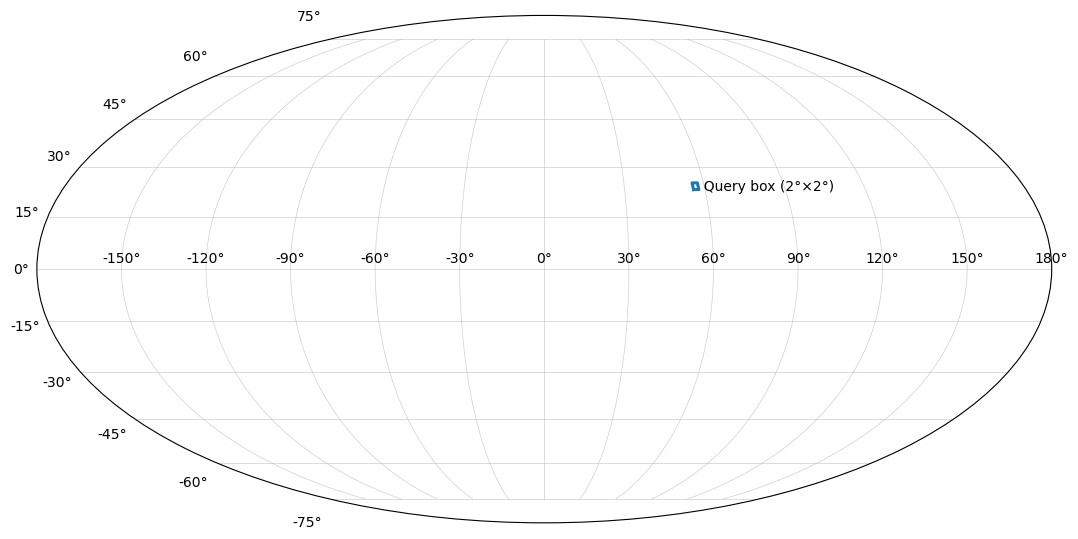
Now, we'll use the `astroquery` module to grab every object that GAIA has observed in that region of the sky.

In [15]:
Gaia.ROW_LIMIT = -1 #This line ensures that there's no cap on the number of objects that we can retrieve
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


Let's check out the data we've just accessed by reading the name and description of each column:

In [16]:
for column in r.colnames:
    print(column,":",r[column].description,", Units: ", r[column].unit)


dist : None , Units:  None
solution_id : Solution Identifier , Units:  None
DESIGNATION : Unique source designation (unique across all Data Releases) , Units:  None
SOURCE_ID : Unique source identifier (unique within a particular Data Release) , Units:  None
random_index : Random index for use when selecting subsets , Units:  None
ref_epoch : Reference epoch , Units:  yr
ra : Right ascension , Units:  deg
ra_error : Standard error of right ascension , Units:  mas
dec : Declination , Units:  deg
dec_error : Standard error of declination , Units:  mas
parallax : Parallax , Units:  mas
parallax_error : Standard error of parallax , Units:  mas
parallax_over_error : Parallax divided by its standard error , Units:  None
pm : Total proper motion , Units:  mas / yr
pmra : Proper motion in right ascension direction , Units:  mas / yr
pmra_error : Standard error of proper motion in right ascension direction , Units:  mas / yr
pmdec : Proper motion in declination direction , Units:  mas / yr
pmde

In [17]:
print(len(r))

32053


So it looks like our Gaia query returned over 30,000 objects Let's first apply some quality cuts on our data to start narrowing down stars in the cluster. In the cell below, find where the error in the proper motion is less than 10%:
$$ \bigg|\frac{x_{\rm err}}{x}\bigg|<0.10$$

Check out the column names and descriptions to find the proper motion and proper motion error in the right ascension and declination.
Let's also ensure that the objects are not quasars or galaxies. Luckily, the Gaia team has already calculated the probability of each other objects being a quasar or galaxy, which are included in the columns `classprob_dsc_combmod_quasar` and `classprob_dsc_combmod_galaxy`. Let's choose objects for which the probability that they are a galaxy or a quasar is less than one percent.


So in summary, your code should check that

1.   Proper motion error in ra is less than 10%
2.   Proper motion error in dec is less than 10%
3.   `classprob_dsc_combmod_quasar` is less than 1%
4.   `classprob_dsc_combmod_galaxy` is less than 1%


In [ ]:
# find the indices here
goodidx =

To check your indices, print the length of the resulting array (you should get something close to 15000):

Ok, now that we've excluded some of the obviously spurious and low-signal data from our dataset, let's try to constrain which of the stars in this field actually belong to the Pleiades cluster. To do this, we'll use their orbital dynamics. Stars in a cluster should all be moving in their orbit around the galaxy in the same direction, so their velocities should be close to one another, whereas unassociated foreground and background stars will have random other velocities because they're not in the same orbit. Let's check out the proper motion in right ascension and declination of the full dataset and the indices of the stars we want to keep (using `goodidx`)

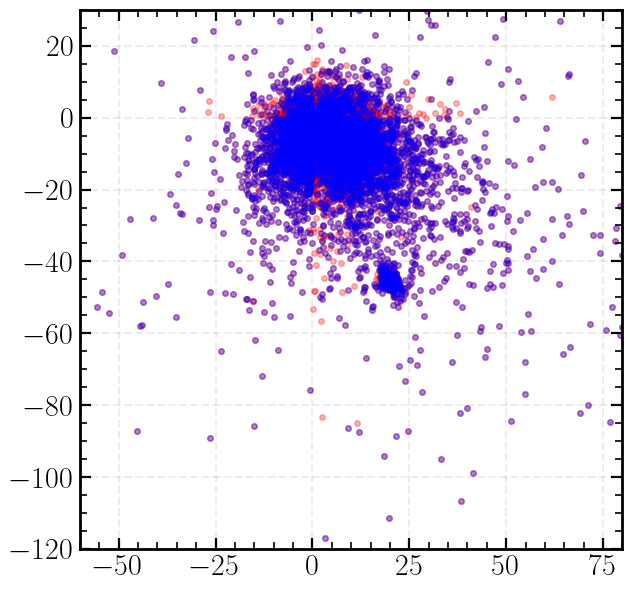

In [20]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3,label = "All Gaia stars in region")
plt.scatter(r['pmra'][goodidx], r['pmdec'][goodidx], color='b', alpha=0.3,label = "Subset of good data")

plt.xlim(-60,80)
plt.ylim(-120,30)
plt.show()

To select only the stars in the Pleiades, let's choose to restrict ourselves to a reasonable range of proper motions close to the [reported values ](https://www.aanda.org/articles/aa/full_html/2019/08/aa35533-19/aa35533-19.html#:~:text=Its%20mean%20proper%20motion%2C%20(%CE%BC,within%20the%20reach%20of%20Gaia.)of (+22.7, -45.5) mas yr$^{-1}$.

Re-define `goodidx` below, adding the following conditions:


1.   The proper motion in right ascension is within 4 mas yr$^{-1}$ of the Pleiades value
2.   The proper motion in declination is within 4 mas yr$^{-1}$ of the Pleiades value



In [ ]:
# refine your search criteria here
goodidx =

Print the new length of `goodidx` so that we can see how many members are actually in the cluster.

Now we'll select just those objects and make some plots!

In [23]:
m45stars = r[goodidx]

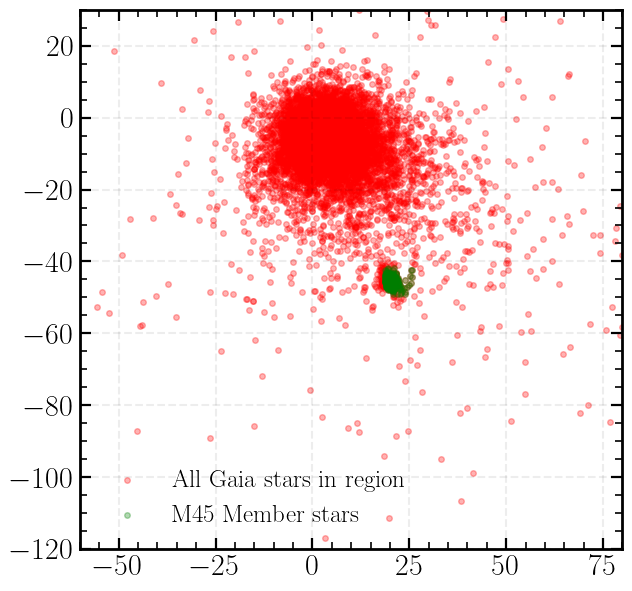

In [24]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3, label = "All Gaia stars in region")
plt.scatter(m45stars['pmra'], m45stars['pmdec'], color='g', alpha=0.3, label = "M45 Member stars")

plt.xlim(-60,80)
plt.ylim(-120,30)
plt.legend()
plt.show()

Great! Now that we have our cluster, we can plot our member stars on a color-magnitude diagram.

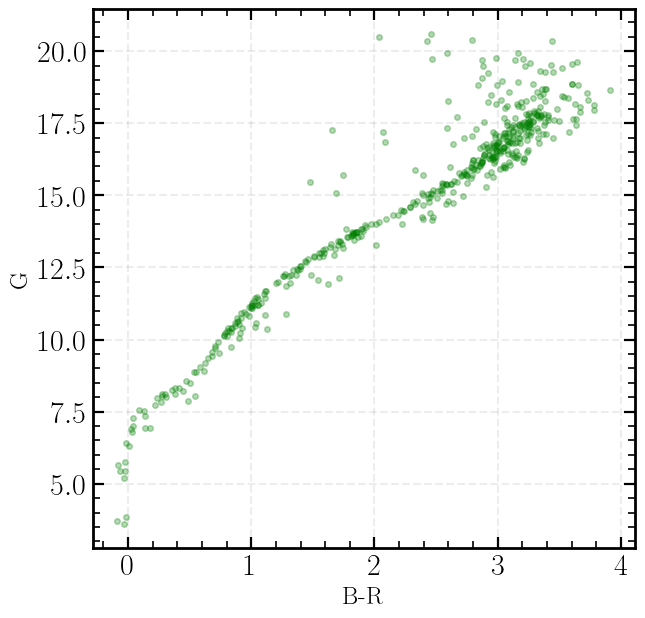

In [25]:
plt.scatter(m45stars['bp_rp'], m45stars['phot_g_mean_mag'], color='g', alpha=0.3)
plt.xlabel("B-R")
plt.ylabel("G")
plt.show()

Finally, you might have noticed that the columns in our dataset didn't contain many physical parameters. The Gaia team has calculated some of the physical properties of the stars in the dataset, but they are stored in another table that we'll need to access. Luckily, since we have already restricted ourselves to a few hundred stars, we can just search up the reference ID numbers of our objects and grab only these objects. Take a look at the cell below to see how we do this, and then run it to grab the physical parameters of our Pleiades stars.

In [30]:
from astropy.table import join

#First, we compile all the ID numbers of our Pleiades stars into a convenient format
source_ids = np.array(m45stars['SOURCE_ID'], dtype=np.int64)
id_list = ",".join(map(str, source_ids))

#Next, we write a "query" to submit to the Gaia dataset asking for the luminosity, radius, and mass of our stars. This is written in a special format called the Astronomical Data Query Language.
query = f"""
SELECT
  ids.source_id,
  ap.lum_flame, ap.radius_flame, ap.mass_flame
FROM gaiadr3.astrophysical_parameters AS ap
JOIN (
  SELECT source_id
  FROM gaiadr3.gaia_source
  WHERE source_id IN ({id_list})
) AS ids
USING (source_id)
"""

#Now we submit the query and get the results
job = Gaia.launch_job_async(query)
res = job.get_results()
print(len(res), res.colnames)
print([res[col].unit for col in res.columns])

# finally, we add the new columns from our results into our Pleiades dataset
m45_with_params = join(m45stars, res, keys_left="SOURCE_ID",keys_right="source_id", join_type="left")


INFO: Query finished. [astroquery.utils.tap.core]
488 ['source_id', 'lum_flame', 'radius_flame', 'mass_flame']
[None, Unit("solLum"), Unit("solRad"), Unit("solMass")]


## Taking these clusters to class
Ok now that we've gone through this process for one cluster, maybe it would be useful to systematize the procedure and generalize it using a `class` (see, I told you it would come back!).

### step 1
In the cell below, create a class named `gaiaCluster` that takes the following *required* input parameters (you should save these to be accessible anywhere in the class)
*   RA
*   dec
*   proper motion in RA
*   proper motion in dec
*   distance to the cluster

and has optional parameters for our filtering criteria
*   width (def. 2 deg)
*   height (def. 2 deg)
*   range of allowed proper motions (def. 4)

### step 2
Then, in the constructor, use the code from above to query the Gaia database and access the stars within that width and height of the RA and dec that the user passes, and save these in a variable that is also stored in the class. (it might be nice to add a print statement here as well that prints the number of objects that the query returned!)

### step 3
After that, add a function to your class to filter those selected objects using the combined criteria you found earlier. Save these in a new class variable called `cluster`. *(think about what argument(s) this function might need)* Again, it might be nice to print out how many objects remain after filtering so we know how many stars our criteria has picked out.

### step 4
Next, add a separate function to the class to query the physical parameters associated with the selected cluster objects and add those to your `cluster` class variable.

### step 5
Then, add a function to compute the *absolute magnitude* for the stars in the `cluster` object and add a column to that table labeled 'G_abs' to store the result. Remember that the equation for absolute magnitude is
$$M = m - 5\log_{10}\bigg(\frac{d}{10\ {\rm pc}}\bigg)$$


### step 6
Finally, add a function to plot the HR diagram for the cluster members, where the x-axis should show the color (for this we'll use BP-RP) and the y-axis should show the *absolute* magnitude (not the apparent magnitudes we plotted before). Also remember that magnitudes go in the opposite direction of all that is good and holy, so set your axis limits accordingly!



In [ ]:
class gaiaCluster:
  # constructor function goes here




  # 'filter_objects' function goes here




  # 'get_physical_properties' function goes here




  # 'get_absolute_mag' function goes here




  # 'plot_hr_diagram' function goes here

If all went well with the class definition above, then the following two cell blocks should run no problem

In [34]:
pleiades = gaiaCluster(ra=56.75*u.deg, dec=24.1167*u.deg,
                       pm_ra = 22.7*u.mas/u.yr, pm_dec = -45.5*u.mas/u.yr,
                       distance=135.74*u.pc)

Querying Gaia database for all objects within 2.0 deg and 2.0 deg of RA: 56.75 deg , dec: 24.1167 deg . This might take a while...
INFO: Query finished. [astroquery.utils.tap.core]
32053 objects found and saved!
Filtering for cluster members...
488 members found!
Now trying to get the physical properties...
INFO: Query finished. [astroquery.utils.tap.core]
...physical properties acquired!


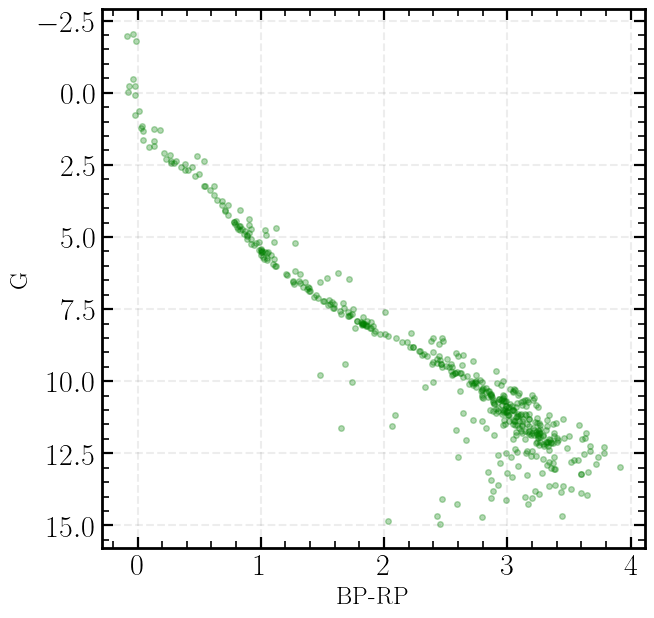

In [35]:
pleiades.plot_hr_diagram()

Now to really see the power of classes, let's try using your class to select the members of a different cluster! However, to do this we'll need the coordinates of those clusters (to filter the part of the sky we search), their known proper motions (to filter for cluster members from the Gaia data), and the distance to them (to finally convert the measured luminosities from apparent to absolute magnitude).

Luckily some folks (thanks Vasiliev and Baumgardt 🙇🙇) have already done the heavy lifting of computing these quantities for us! Open up the following two papers:
*   for the distances, Table 2 in [Baumgardt & Vasiliev (2021)](https://academic.oup.com/mnras/article/505/4/5957/6283731?login=true)
*   for the coordinates and proper motions, Table A1 in [Vasiliev & Baumgardt (2021)](https://academic.oup.com/mnras/article/505/4/5978/6283730?login=true)

Pick any object from these tables and try using your class on it below! When you run this, I would advise you to select an object with <4000 cluster members (see the last column in the second paper for this number) so that the Gaia query doesn't take all night, shrink your selection width and height to $\lesssim 1$ deg, and make your range of allowed proper motions small.


In [ ]:
# here's one that we did for example
NGC5024 = gaiaCluster(ra=198.23*u.deg, dec=18.168*u.deg,
                      pm_ra = -0.133*u.mas/u.yr *np.cos(198.23*u.deg),
                      pm_dec = -1.331*u.mas/u.yr,
                      distance = 18.518*u.kpc,
                      width=1*u.deg, height=1*u.deg, deltapm=0.5)

Querying Gaia database for all objects within 1.0 deg and 1.0 deg of RA: 198.23 deg , dec: 18.168 deg . This might take a while...
INFO: Query finished. [astroquery.utils.tap.core]
20168 objects found and saved!
Filtering for cluster members...
329 members found!
Now trying to get the physical properties...
INFO: Query finished. [astroquery.utils.tap.core]
...physical properties acquired!


Plot the HR diagram for that cluster below! Does it look any different from the pleiades?

To make the comparison easier, in the cell below, put the two HR diagrams on the same plot. *hint: you won't be able to use your function from before, but you can access the table that you created in your class(es)...*

What do you notice about these two clusters when directly compared on an HR diagram? Why might there be differences in the regions they occupy?

If you have extra time, try plotting the HR diagram for one cluster, but now instead of making all the points the same color, color them by the properties of the member stars, like mass, luminosity, or temperature. *hint: you might find it helpful to use plt.colorbar() and the 'c' argument in the scatter function for this*

This might help you understand why the HR diagram is sometimes plotted not as magnitude vs. color but instead as luminosity vs. temperature.